In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import seaborn as sns

In [81]:
detention_data = pd.read_csv("Datasets\State-wise Detentions.csv")

sterilisation_data = pd.read_csv("Datasets\State-wise Sterilisations.csv")
sterilisation_data["Precentage Increase in Sterilisation"] = sterilisation_data["1976-77"]/sterilisation_data["1975-76"] * 100
sterilisation_data["Precentage Increase in Sterilisation"]=sterilisation_data["Precentage Increase in Sterilisation"].replace({np.Inf:np.nan})


authority_abuses_data= pd.read_csv("Datasets\State-wise Abuse of Authority.csv")

election_data= pd.read_csv("Datasets\General Election Data.csv")

india_map= gpd.read_file("India Map\India Map 1977\india_map_1977.shp")

In [82]:
india_map = india_map.merge(detention_data[["States", "Detentions per million population"]], on="States")
india_map = india_map.merge(sterilisation_data[["States", "Sterilisation per thousand population", "Precentage Increase in Sterilisation"]], on="States" )
india_map = india_map.merge(authority_abuses_data[["States", "Instances of abuse of Authority per Million Population"]], on="States")

india_map.head()

,States,geometry,Detentions per million population,Sterilisation per thousand population,Precentage Increase in Sterilisation,Instances of abuse of Authority per Million Population
0,Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",848.68,10.64,568.595041,105.26
1,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",111.26,18.14,449.079394,9.87
2,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.82,0.53,1218.181818,32.73
3,Assam,"MULTIPOLYGON (((95.96661 27.94694, 95.95369 27...",178.84,22.88,153.312549,14.02
4,Bihar,"POLYGON ((87.79328 25.22107, 87.79086 25.20967...",160.09,13.39,410.799186,10.60


Text(0.5, 1.0, 'Instances of Abuse of Authority')

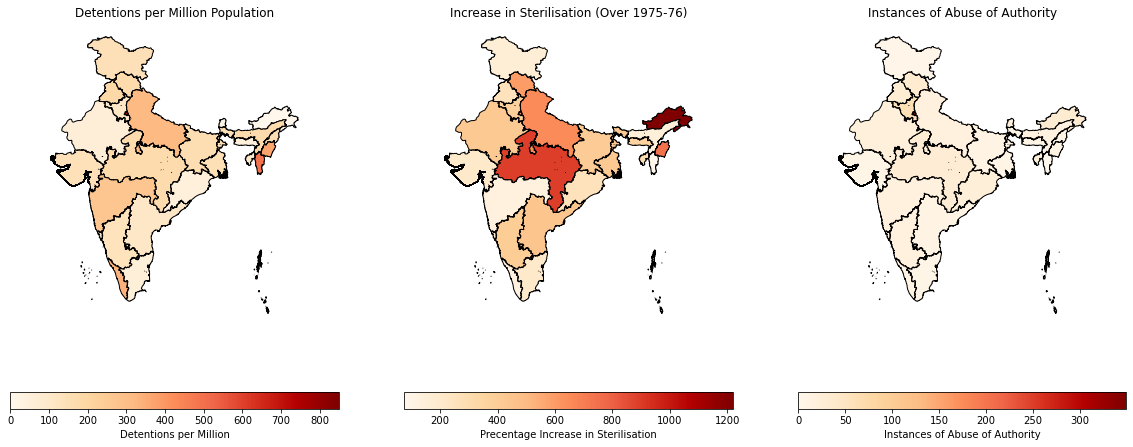

In [87]:
fig, (ax1,ax2, ax3)= plt.subplots(ncols=3, figsize=(20,8))

india_map.plot(column="Detentions per million population", ax=ax1, legend=True, edgecolor="black", cmap='OrRd',
               legend_kwds={'label': "Detentions per Million",'orientation': "horizontal"})
ax1.set_title("Detentions per Million Population")
ax1.set_axis_off()

india_map.plot(column="Precentage Increase in Sterilisation", ax=ax2, legend=True, edgecolor="black", cmap='OrRd',
               legend_kwds={'label': "Precentage Increase in Sterilisation",'orientation': "horizontal"})
ax2.set_title("Increase in Sterilisation (Over 1975-76)" )
ax2.set_axis_off()

india_map.plot(column="Instances of abuse of Authority per Million Population", ax=ax3, legend=True, edgecolor="black", cmap='OrRd',
               legend_kwds={'label': "Instances of Abuse of Authority",'orientation': "horizontal"})
ax3.set_axis_off()
ax3.set_title("Instances of Abuse of Authority")

In [84]:
#Calculating state-wise average vote share of Congress candidates in 1971 election
inc_1971=election_data[(election_data['Year']==1971) & (election_data["Party"]=="INC")]         
inc_1971=inc_1971.groupby("State_Name")

inc_1971= inc_1971.Vote_Share_Percentage.agg(np.mean)


#Calculating state-wise average vote share of Congress candidates in 1977 election
inc_1977=election_data[(election_data['Year']==1977) & (election_data["Party"]=="INC")]         
inc_1977=inc_1977.groupby("State_Name")

inc_1977= inc_1977.Vote_Share_Percentage.agg(np.mean)


#Calculating diffrence in state-wise average vote share among the 1971 and 1977 election
vote_diff= inc_1977 - inc_1971

india_map=india_map.merge(vote_diff, left_on="States", right_on="State_Name")
india_map.rename(columns={"Vote_Share_Percentage":"vote_diff"}, inplace=True)

<AxesSubplot:xlabel='Instances of abuse of Authority per Million Population', ylabel='vote_diff'>

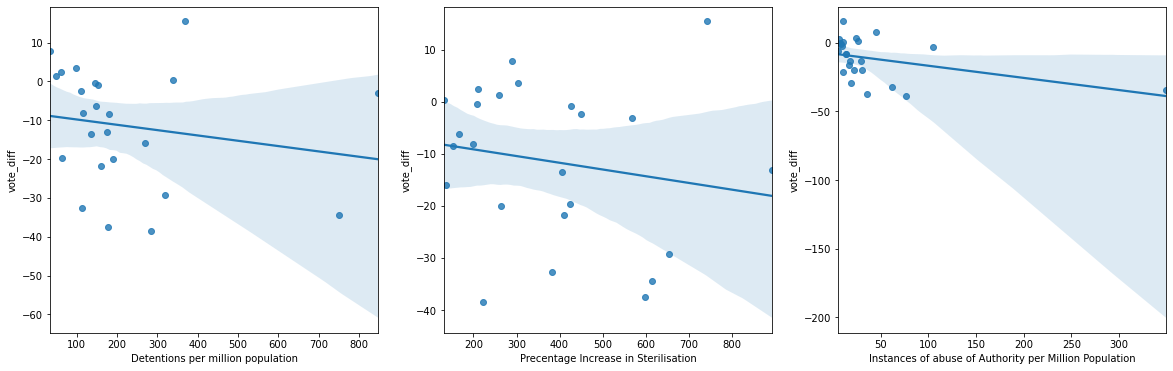

In [96]:
fig,(ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(20, 6))

sns.regplot(data=india_map, y="vote_diff", x="Detentions per million population", ax=ax1)

sns.regplot(data=india_map, y="vote_diff", x="Precentage Increase in Sterilisation", ax=ax2)

sns.regplot(data=india_map, y="vote_diff", x="Instances of abuse of Authority per Million Population", ax=ax3)

In [86]:
india_map.corr(method="spearman")

,Detentions per million population,Sterilisation per thousand population,Precentage Increase in Sterilisation,Instances of abuse of Authority per Million Population,vote_diff
Detentions per million population,1.000000,0.260081,-0.051232,0.136909,-0.361739
Sterilisation per thousand population,0.260081,1.000000,0.043350,0.304668,-0.341739
Precentage Increase in Sterilisation,-0.051232,0.043350,1.000000,0.430841,-0.195652
Instances of abuse of Authority per Million Population,0.136909,0.304668,0.430841,1.000000,-0.466957
vote_diff,-0.361739,-0.341739,-0.195652,-0.466957,1.000000
